# Exercise 19 : Computing normal vectors
A robust algorithm to compute the normal of a plane polygon is given by the Newell algorithm.

In [44]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import math

In [81]:
vertices = {
    0: {'x': 1, 'y': 0, 'z': 0},
    1: {'x': 0, 'y': 1, 'z': 0},
    2: {'x': -1, 'y': 0, 'z': 0},
    3: {'x': 0, 'y': -1, 'z': 0},
    4: {'x': 0.5, 'y': 0, 'z': 1},
    5: {'x': 0, 'y': 0.5, 'z': 1},
    6: {'x': -0.5, 'y': 0, 'z': 1},
    7: {'x': 0, 'y': -0.5, 'z': 1},
}

faces = {
    'bottom': [0, 3, 2, 1],
    'top': [4, 5, 6, 7],
    'front': [0, 4, 7, 3],
    'back': [1, 2, 6, 5],
    'left': [2, 3, 7, 6],
    'right': [0, 1, 5, 4],
}

In [82]:
normals = {}

for name, face in faces.items():
    nx = 0
    ny = 0
    nz = 0
    
    for i in range(0, len(face)):
        nx += ((vertices[face[i]]['y'] - vertices[face[(i + 1) % 4]]['y']) *
               (vertices[face[i]]['z'] + vertices[face[(i + 1) % 4]]['z']))
        ny += ((vertices[face[i]]['z'] - vertices[face[(i + 1) % 4]]['z']) *
               (vertices[face[i]]['x'] + vertices[face[(i + 1) % 4]]['x']))
        nz += ((vertices[face[i]]['x'] - vertices[face[(i + 1) % 4]]['x']) *
               (vertices[face[i]]['y'] + vertices[face[(i + 1) % 4]]['y']))
    length = math.sqrt(nx*nx + ny*ny + nz*nz)
    nx = nx / length
    ny = ny / length
    nz = nz / length
    normals[name] = {'x': nx, 'y': ny, 'z': nz}

<IPython.core.display.Javascript object>


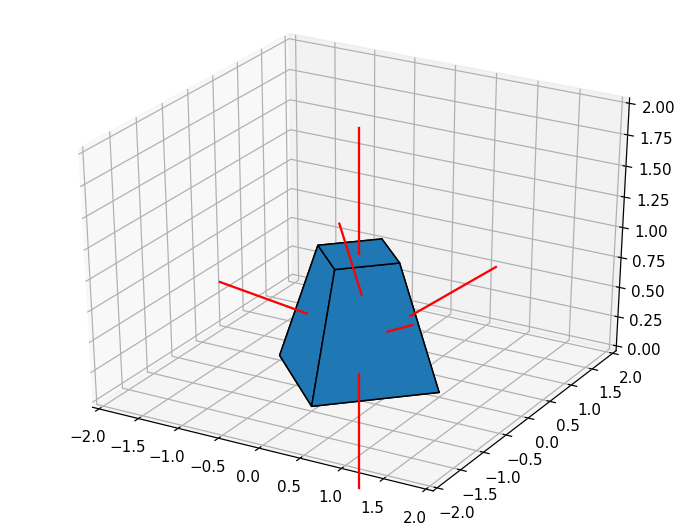

In [84]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(0, 2)

polygons = []
normal_lines = []
for face_name, face in faces.items():
    polygon = [[vertices[v]['x'], vertices[v]['y'], vertices[v]['z']] for v in face]
    polygons.append(polygon)

    first = vertices[face[0]]
    third = vertices[face[2]]
    
    normal = normals[face_name]
    
    normal_start = [
        (first['x'] + third['x']) / 2,
        (first['y'] + third['y']) / 2,
        (first['z'] + third['z']) / 2,
    ]
    
    normal_end = [
        normal_start[0] + normal['x'],
        normal_start[1] + normal['y'],
        normal_start[2] + normal['z'],
    ]

    normal_lines.append([normal_start, normal_end])


for normal_line in normal_lines:
    x = [normal_line[0][0], normal_line[1][0]]
    y = [normal_line[0][1], normal_line[1][1]]
    z = [normal_line[0][2], normal_line[1][2]]
    ax.plot(x,y,z, color='r')
ax.add_collection3d(Poly3DCollection(polygons, edgecolors='black'))
plt.show() 